In [118]:
import pandas as pd
import numpy as np
import os
import string
import math
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
import matplotlib
from scipy.stats import norm
from scipy import stats
matplotlib.style.use('ggplot')
%matplotlib inline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import *
from sklearn.ensemble import *
from sklearn.neural_network import *
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
import scikitplot as skplt 
from subprocess import check_output

import warnings; warnings.simplefilter('ignore')

os.chdir('/Users/pawanshivhare/Desktop/fbprep/class')

print(check_output(["ls","../class"]).decode('utf8'))

test_66516Ee.csv
train_ZoGVYWq.csv



In [36]:
data=pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')

print(data.shape)

num_cols=data._get_numeric_data().columns.tolist()
cat_cols=list(set(data.columns.tolist()) - set(num_cols))

print(num_cols)
print(cat_cols)

redun_num_cols=[]
redun_cat_cols=[]

data[num_cols].describe().T

(204, 2)
['value']
['date']


,count,mean,std,min,25%,50%,75%,max
value,204.0,10.69443,5.956998,2.81452,5.844095,9.319345,14.289964,29.665356


In [38]:
data['date']=pd.to_datetime(data['date'])
data['year']=[x.year for x in data['date']]
data['month']=[x.month for x in data['date']]

In [52]:
data['date'].shape

(204,)

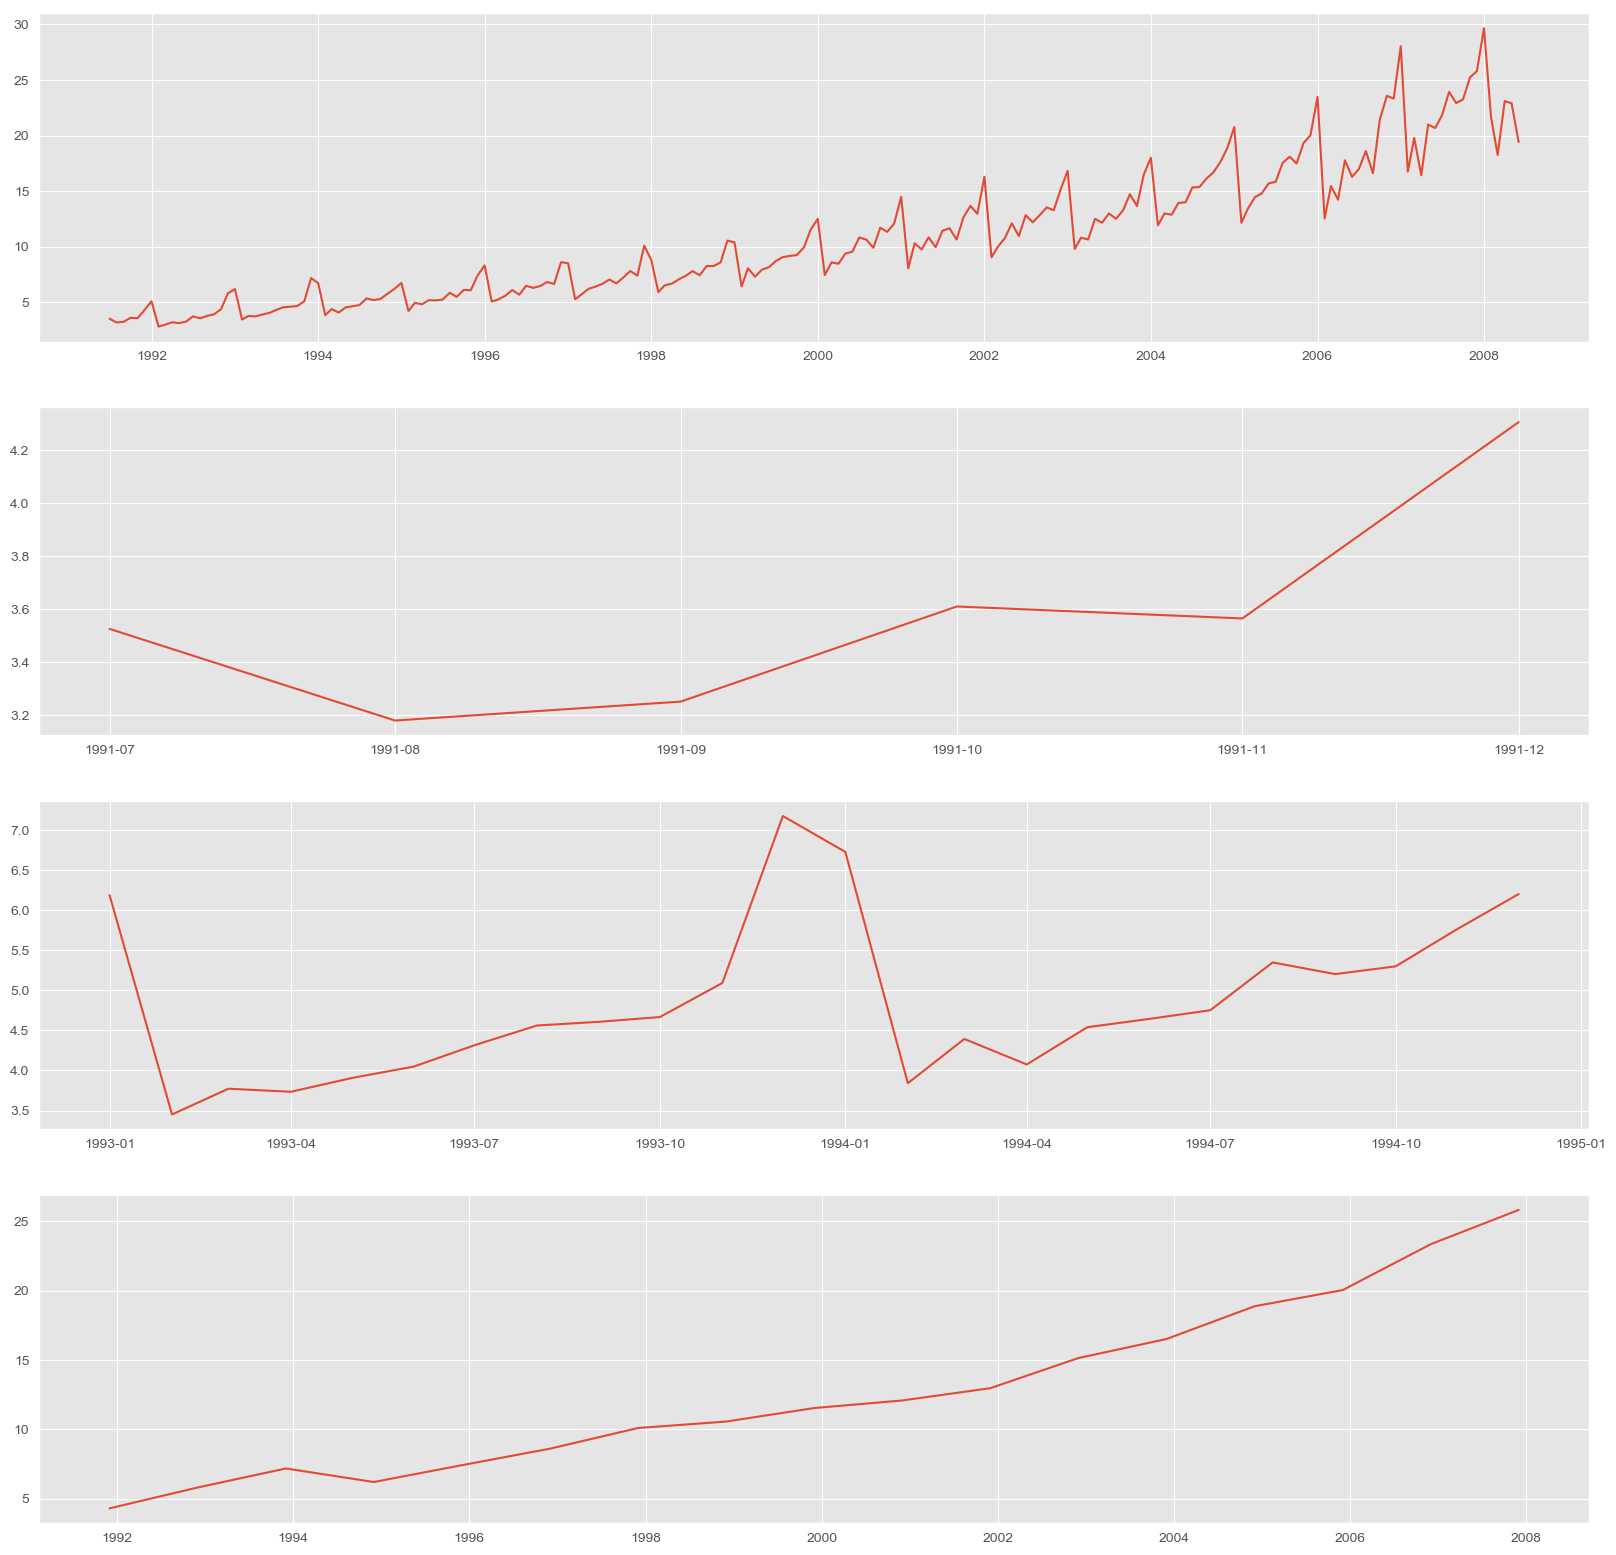

In [77]:
fig, axes =plt.subplots(nrows=4, ncols=1, figsize=(20,20), dpi=100)
axes[0].plot(data['date'], data['value'])
axes[1].plot(data[(data['year']==1991)]['date'], data[(data['year']==1991)]['value'])
axes[2].plot(data[(data['year'] > 1992) & (data['year'] < 1995)]['date'], data[(data['year'] > 1992) & (data['year'] < 1995)]['value'])
axes[3].plot(data[(data['month']==12)]['date'], data[(data['month']==12)]['value'])

#plt.plot(data[(data['date'].year==1991)]['date'], data[(data['date'].year==1991)]['value'], label='Original Series')

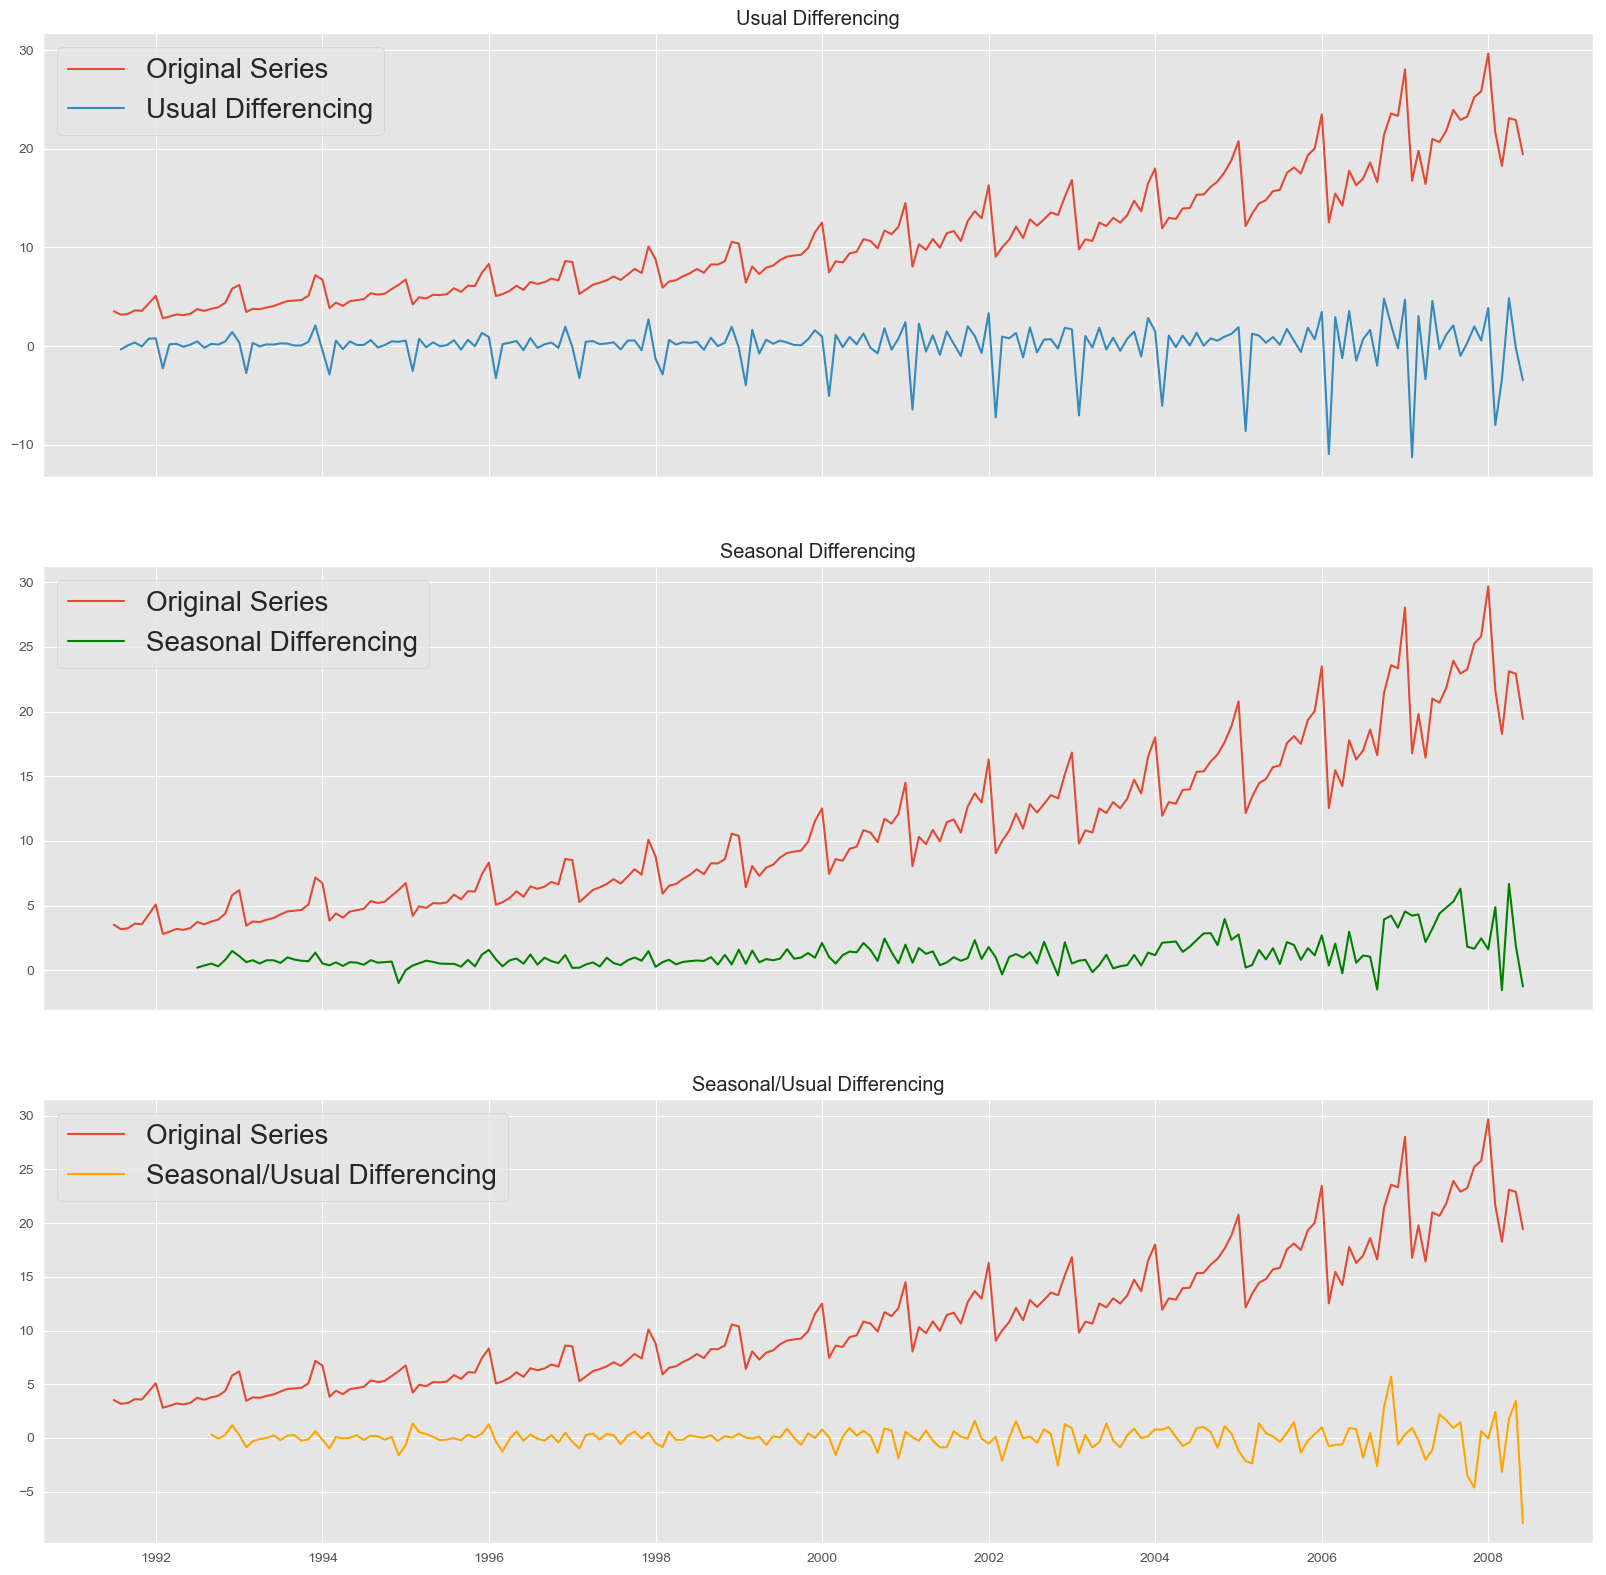

In [89]:
fig, axes =plt.subplots(nrows=3, ncols=1, figsize=(20,20), dpi=100, sharex=True)
axes[0].plot(data['date'], data['value'], label='Original Series')
axes[0].plot(data['date'], data['value'].diff(1), label='Usual Differencing')
axes[0].set_title("Usual Differencing")
axes[0].legend(loc="upper left",fontsize=20)


axes[1].plot(data['date'], data['value'], label='Original Series')
axes[1].plot(data['date'], data['value'].diff(12), label='Seasonal Differencing', color="green")
axes[1].set_title("Seasonal Differencing")
axes[1].legend(loc="upper left",fontsize=20)


axes[2].plot(data['date'], data['value'], label='Original Series')
axes[2].plot(data['date'], data['value'].diff(12).diff(2), label='Seasonal/Usual Differencing', color="orange")
axes[2].set_title("Seasonal/Usual Differencing")
axes[2].legend(loc="upper left",fontsize=20)



In [91]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(data.value.diff().diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -10.292305
p-value: 0.000000


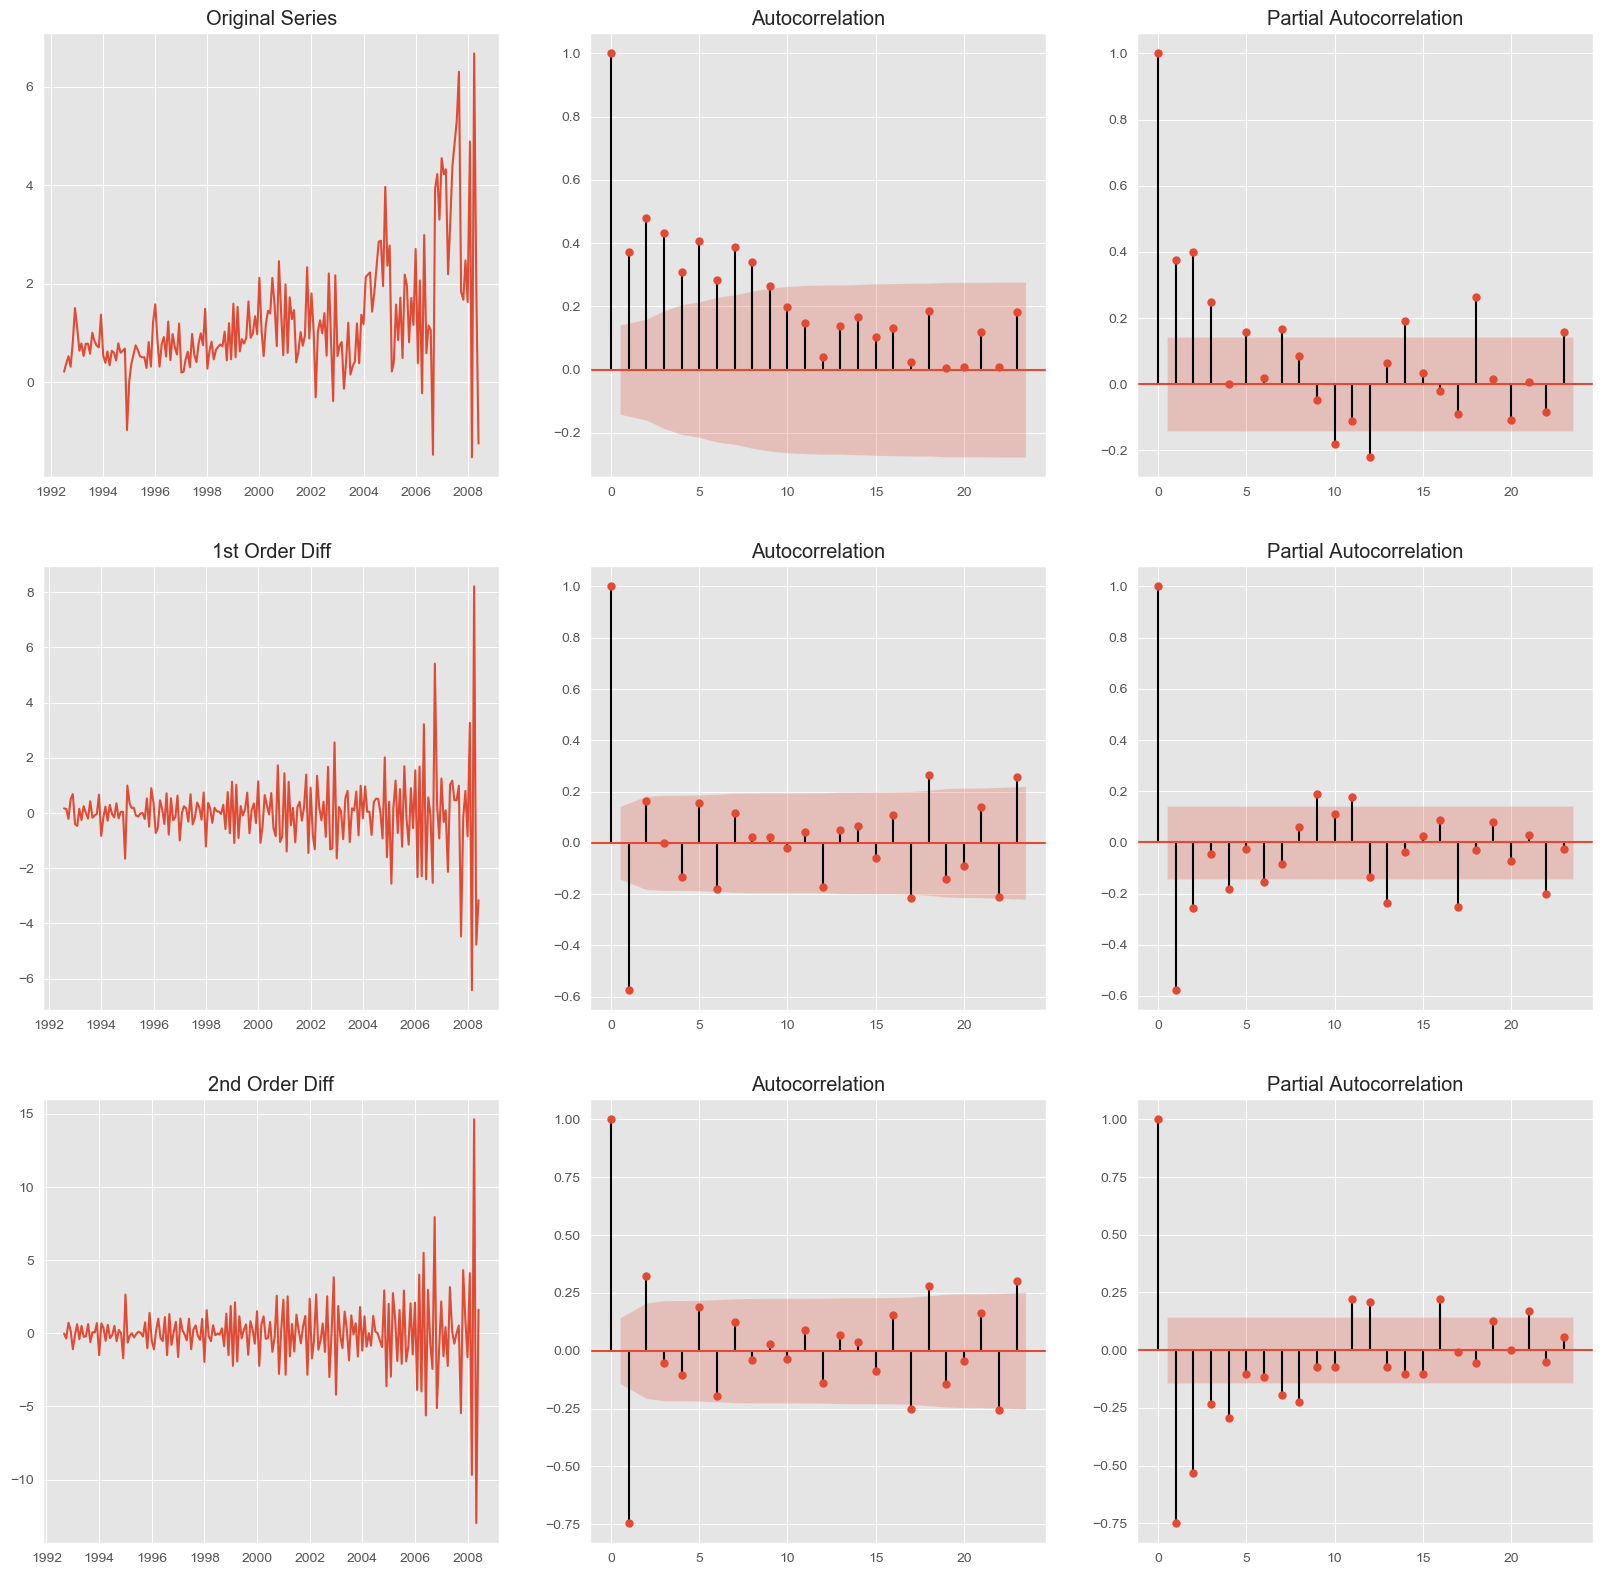

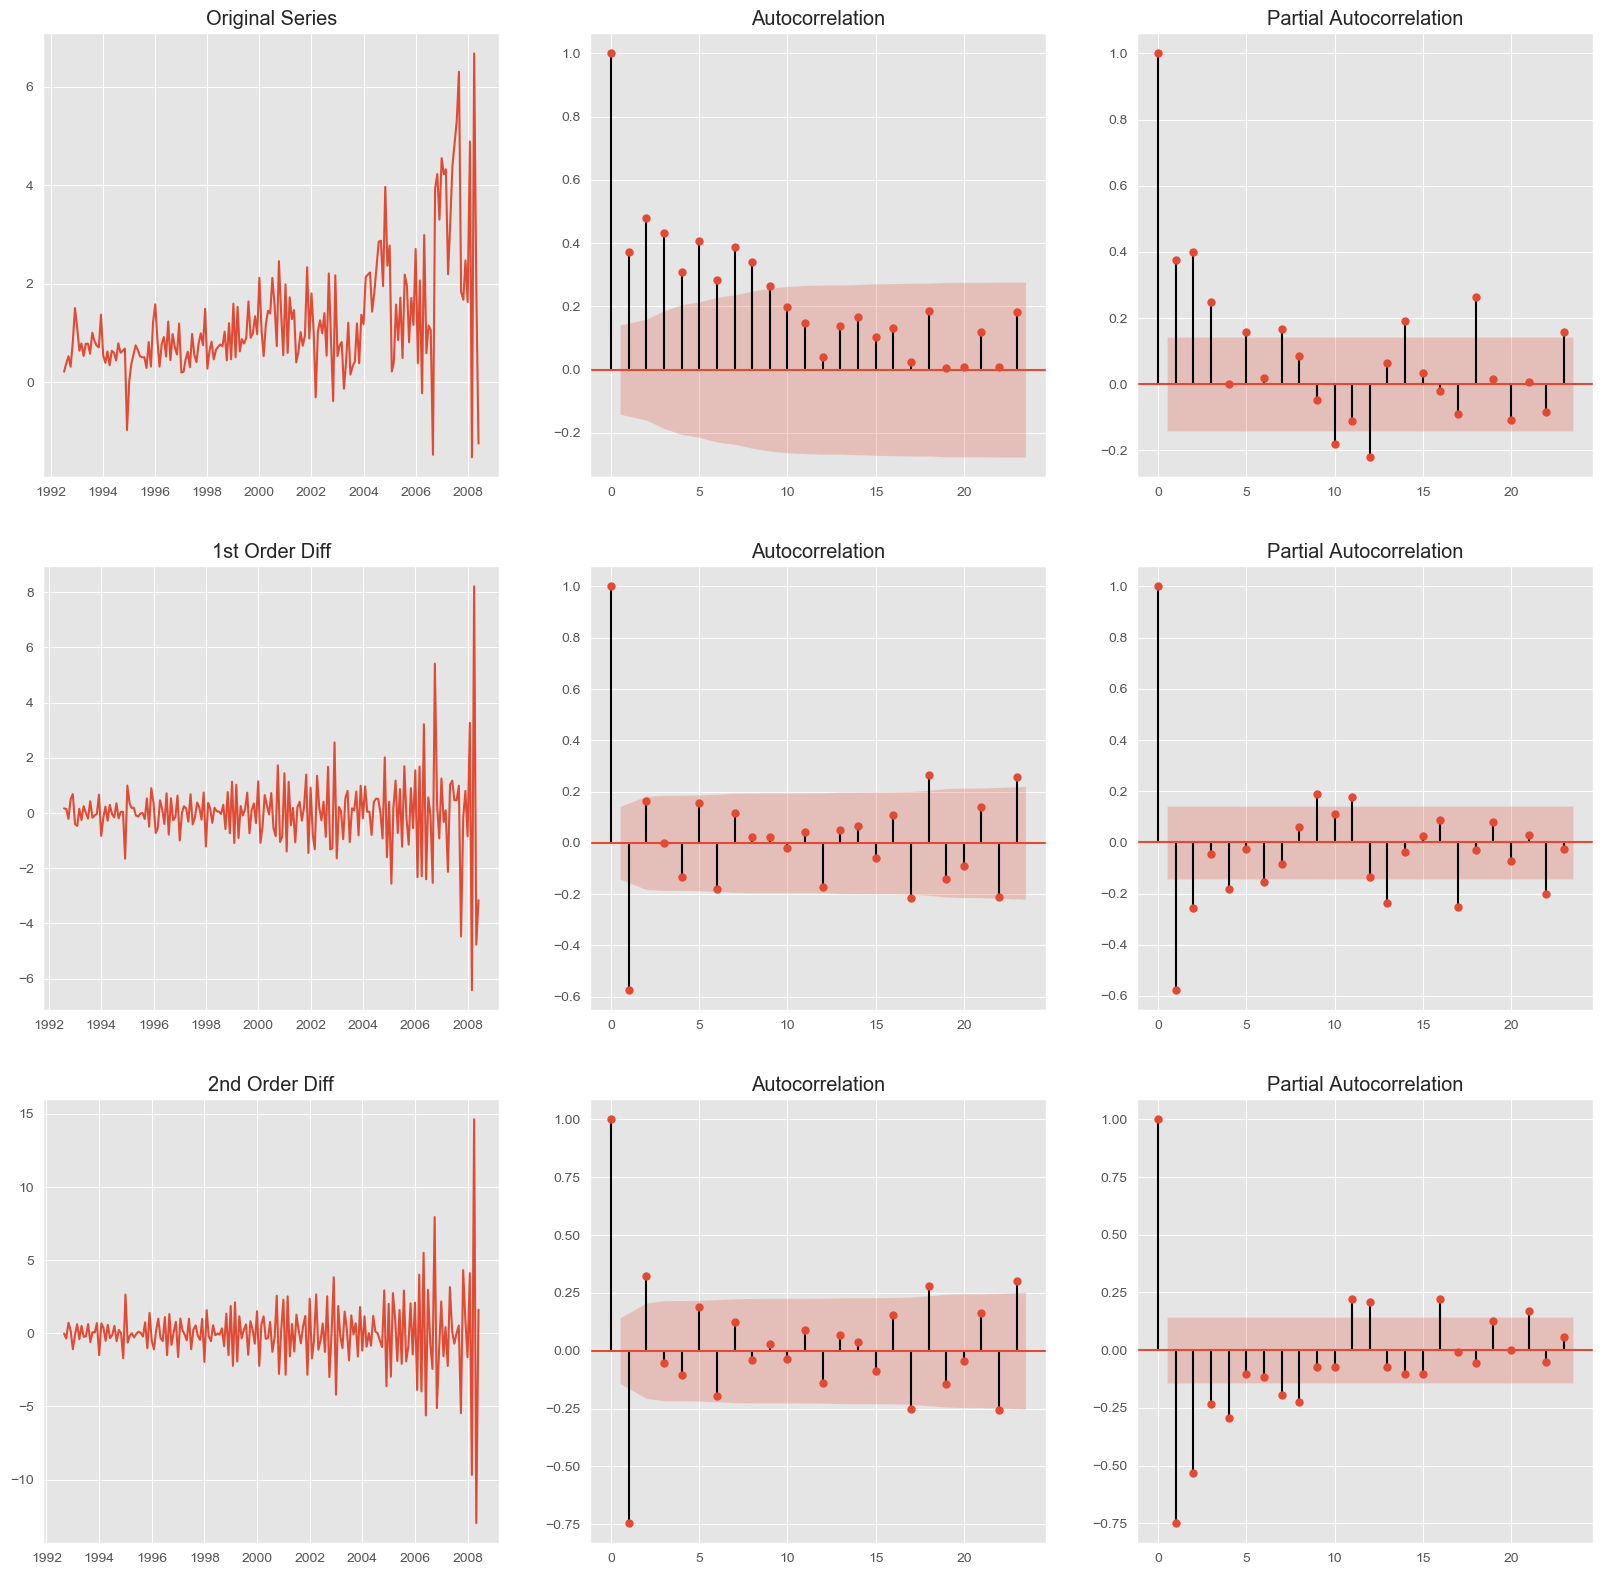

In [129]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes =plt.subplots(nrows=3, ncols=3, figsize=(20,20), dpi=100)
axes[0,0].plot(data['date'], data['value'].diff(12)); axes[0,0].set_title('Original Series')
plot_acf(data['value'].diff(12).dropna(),ax=axes[0, 1])
plot_pacf(data['value'].diff(12).dropna(),ax=axes[0, 2])

axes[1,0].plot(data['date'], data['value'].diff(12).diff()); axes[1,0].set_title('1st Order Diff')
plot_acf(data['value'].diff(12).diff().dropna(),ax=axes[1, 1])
plot_pacf(data['value'].diff(12).diff().dropna(),ax=axes[1, 2])

axes[2,0].plot(data['date'], data['value'].diff(12).diff().diff()); axes[2,0].set_title('2nd Order Diff')
plot_acf(data['value'].diff(12).diff().diff().dropna(),ax=axes[2, 1])
plot_pacf(data['value'].diff(12).diff().diff().dropna(),ax=axes[2, 2])


In [136]:
import pmdarima as pm

train=data[(data['year'])<=2006]
test=data[(data['year'])>2006]
print(train.shape)
print(test.shape)


(186, 4)
(18, 4)


In [137]:

smodel = pm.auto_arima(train['value'], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()


Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 1, 1, 12) (constant=True); AIC=396.544, BIC=412.339, Time=1.333 seconds
Fit ARIMA: (0, 0, 0)x(0, 1, 0, 12) (constant=True); AIC=428.858, BIC=435.176, Time=0.045 seconds
Fit ARIMA: (1, 0, 0)x(1, 1, 0, 12) (constant=True); AIC=419.337, BIC=431.974, Time=0.483 seconds
Fit ARIMA: (0, 0, 1)x(0, 1, 1, 12) (constant=True); AIC=424.317, BIC=436.954, Time=0.262 seconds
Fit ARIMA: (0, 0, 0)x(0, 1, 0, 12) (constant=False); AIC=590.594, BIC=593.753, Time=0.024 seconds
Fit ARIMA: (1, 0, 1)x(0, 1, 0, 12) (constant=True); AIC=399.322, BIC=411.958, Time=0.405 seconds
Fit ARIMA: (1, 0, 1)x(1, 1, 1, 12) (constant=True); AIC=403.325, BIC=422.279, Time=1.861 seconds
Near non-invertible roots for order (1, 0, 1)(1, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.996)
Fit ARIMA: (1, 0, 1)x(0, 1, 2, 12) (constant=True); AIC=397.731, BIC=416.685, Time=3.829 seconds
Fit ARIMA: (1, 0, 1)x

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  186
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood                -193.272
Date:                            Fri, 10 Apr 2020   AIC                            396.544
Time:                                    01:20:19   BIC                            412.339
Sample:                                         0   HQIC                           402.951
                                            - 186                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0250      0.033      0.758      0.448      -0.040       0.090
ar.L1          0.9775      0.027     36.216      0.000       0.925       1.030
ma.L1         -0.8142      0.045    -18.124      0.000      -0.902      -0.726
ma.S.L12      -0.2487      0.071     -3.511      0.000      -0.387      -0.110
sigma2         0.5355      0.038     13.991      0.000       0.461       0.611
===================================================================================
Ljung-Box (Q):                       43.50   Jarque-Bera (JB):                79.52
Prob(Q):                              0.32   Prob(JB):                         0.00
Heteroskedasticity (H):               8.02   Skew:                             0.54
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

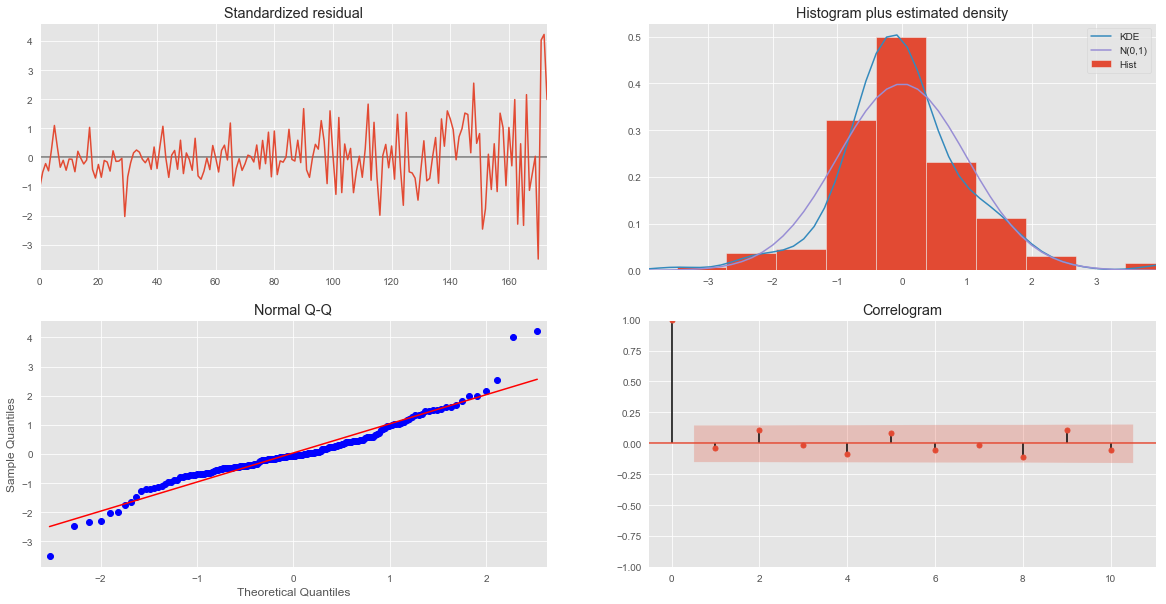

In [138]:
smodel.plot_diagnostics(figsize=(20,10))
plt.show()

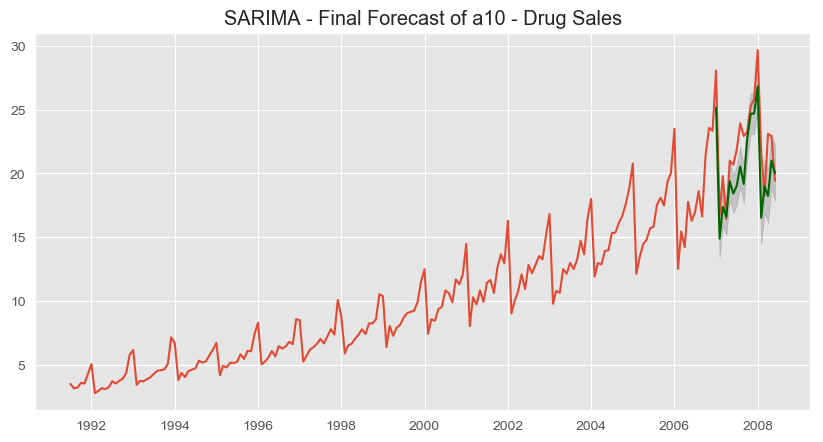

In [141]:
n_periods = 18
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = test['date']

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
fig=plt.figure(figsize=(10,5),dpi=100)
plt.plot(data['date'],data['value'])
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of a10 - Drug Sales")
plt.show()

In [149]:
fc=np.array(fitted_series).flatten()
ac=np.array(test.value).flatten()

def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse})

forecast_accuracy(fc, ac)

{'mape': 0.09746078241356333,
 'me': -2.0253872198749954,
 'mae': 2.1939395598811635,
 'mpe': -0.0883156944814959,
 'rmse': 2.6170285855523274}